In [2]:
import numpy as np
import cv2
import pandas as pd
import os
import pickle

In [3]:
face_detection_model = '/content/drive/MyDrive/models/res10_300x300_ssd_iter_140000_fp16.caffemodel'
face_detection_proto='/content/drive/MyDrive/models/deploy.prototxt.txt'
face_descriptor='/content/drive/MyDrive/models/openface.nn4.small2.v1.t7'



detector_model=cv2.dnn.readNetFromCaffe(face_detection_proto,face_detection_model)
descriptor_model=cv2.dnn.readNetFromTorch(face_descriptor)

In [4]:
import matplotlib.pyplot as plt
def display(img):
    plt.imshow(img[:,:,[2,1,0]])
    plt.show()

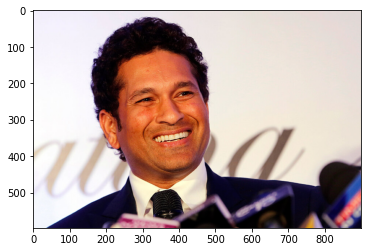

In [5]:
img= cv2.imread('/content/drive/MyDrive/project_face_recog/images/Sachin Tendulkar/1118-India-Cricket-Sachin-Tendulkar.jpg')
display(img)


In [7]:
def helper(image_path): 
  img = cv2.imread(image_path)
  image= img.copy()
  h,w = image.shape[:2]
  img_blob = cv2.dnn.blobFromImage(image,1,(300,300),(104,177,123),False)
  #set input
  detector_model.setInput(img_blob)
  detections = detector_model.forward()

  if len(detections) >0 :
    i = np.argmax(detections[0,0,:,2])
    confidence=detections[0,0,i,2]

    if confidence>0.5 : 
      box= detections[0,0,i,3:7]*np.array([w,h,w,h])
      startx,starty,endx,endy = box.astype('int')
      
      #face dectection
      img_draw=image.copy()
      cv2.rectangle(img_draw,(startx,starty),(endx,endy),(0,255,0),3)

      #feature extracxtion
      roi=image[starty:endy,startx:endx].copy()

      faceblob=cv2.dnn.blobFromImage(roi,1/255,(96,96),(0,0,0),True,True)
      descriptor_model.setInput(faceblob)
      vectors=descriptor_model.forward()
      return vectors
  return None


In [8]:
helper('/content/drive/MyDrive/project_face_recog/images/Sachin Tendulkar/Sachin-Tendulkar_17786ab1bf4_medium.jpg')

array([[-7.67975599e-02,  7.30794817e-02, -7.14131165e-03,
         3.76536995e-02,  1.60439163e-02,  2.72308767e-01,
        -3.05439103e-02, -1.05202004e-01, -4.32456248e-02,
         3.57225537e-02,  5.57952598e-02, -1.12894108e-03,
        -4.23310474e-02, -1.43232957e-01,  6.70894086e-02,
        -5.05172573e-02, -1.54235184e-01,  1.29906744e-01,
         7.12754801e-02, -1.04547687e-01,  2.67065335e-02,
        -1.10308779e-02, -1.82782859e-02, -3.95666249e-02,
         9.83712673e-02, -7.55425030e-03, -1.12322249e-01,
        -1.62148729e-01, -2.42234375e-02, -2.60027740e-02,
         1.95446953e-01, -4.18229513e-02, -8.23883116e-02,
        -6.09560832e-02,  1.69169873e-01,  1.26785174e-01,
        -1.10653087e-01, -2.11884335e-01,  8.08425024e-02,
        -1.46457786e-02,  1.12840578e-01, -8.08999613e-02,
        -4.43448499e-02,  1.32410586e-01, -1.20871060e-01,
        -7.83748776e-02,  9.21556950e-02,  1.02858869e-02,
        -1.21558666e-01, -8.89809877e-02, -2.57187616e-0

In [13]:
data=dict(data=[],label=[])
folders = os.listdir('/content/drive/MyDrive/project_face_recog/images')
for folder in folders:
  filenames=os.listdir('/content/drive/MyDrive/project_face_recog/images/{}'.format(folder))
  for filename in filenames:
    try:
        vector=helper('/content/drive/MyDrive/project_face_recog/images/{}/{}'.format(folder,filename))
        if vector is not None :
          data['data'].append(vector)
          data['label'].append(folder)
          print("Feature Extracted Successfully")
    except:
      pass


Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature Extracted Successfully
Feature 

In [14]:
data

Output hidden; open in https://colab.research.google.com to view.

In [15]:
pd.Series(data['label']).value_counts()

Robert Downey Jr      125
Donald Trump          122
Barack Obama          122
Scarlett Johansson    119
Elon Musk             117
Lionel Messi          114
Roger Federer         111
Cristiano Ronaldo     109
Salman Khan           107
Sachin Tendulkar      107
Leonardo DiCaprio     106
Aamir Khan            103
Angelina Jolie         99
Joe Biden              98
Tom Curise             96
dtype: int64

In [16]:
!pwd

/content


In [17]:
pickle.dump(data,open('/content/drive/MyDrive/project_face_recog/data_face_features.pickle',mode='wb'))